Complete the exercises below For **Assignment #11**.

For this assignment we'll use the [California Housing Data](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html).

This data is available in the [Scikit-Learn](https://scikit-learn.org/stable/index.html) Python module.

To retrieve the data,
1. open a new Python notebook with the `data730` kernel, and,
2. run the following code.

```python
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

(
    california_housing.data
    .assign(MedianHouseValue=california_housing.target)
    .to_csv('california-housing.csv', index=False)
)
```

This will produce a new file called `california-housing.csv` that we'll import in this notebook.

Back in the Python notebook, you can use the following snippet to get a description of the dataset.

```python
print(california_housing.DESCR)
```


Load the `tidymodels` package.

In [1]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

(
    california_housing.data
    .assign(MedianHouseValue=california_housing.target)
    .to_csv('california-housing.csv', index=False)
)

In [2]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [3]:

import pandas as pd

# Load the California Housing CSV file
housing = pd.read_csv('california-housing.csv')

# Display the first few rows of the dataframe
housing.head()




,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Run the following cell to read in our data.

In [5]:
import pandas as pd

# Load the California Housing CSV file
housing = pd.read_csv('california-housing.csv')

# Display the first few rows of the dataframe
print(housing.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedianHouseValue  
0    -122.23             4.526  
1    -122.22             3.585  
2    -122.24             3.521  
3    -122.25             3.413  
4    -122.25             3.422  


Let's build a random forest model to predict `MedianHouseValue`.

1. Create your model, set the engine to `ranger` with `importance = 'impurity'` and the mode as `regression`.
2. Fit the model using `MedianHouseValue` as the response variable and all other columns as predictors.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('california-housing.csv')

# Define the predictors (all columns except 'MedianHouseValue') and response variable
X = df.drop(columns='MedianHouseValue')
y = df['MedianHouseValue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor with impurity-based feature importance
model = RandomForestRegressor(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Display feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("Feature importances based on impurity:")
print(feature_importances.sort_values(ascending=False))


Mean Squared Error: 0.2553684927247781
R^2 Score: 0.8051230593157366
Feature importances based on impurity:
MedInc        0.524871
AveOccup      0.138443
Latitude      0.088936
Longitude     0.088629
HouseAge      0.054593
AveRooms      0.044272
Population    0.030650
AveBedrms     0.029606
dtype: float64


❓ What is the OOB error for this model?

**Answer:**

OOB Error is 0.8051230593157366



Plot the feature importances using the `vip` package. Remember that you can use the `extract_fit_engine` function to get the `ranger` model object to send to the `vip` function.

In [16]:
!pip install seaborn

In [17]:
import matplotlib.pyplot as plt
import seaborn

/tmp/ipykernel_986/2818598567.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')


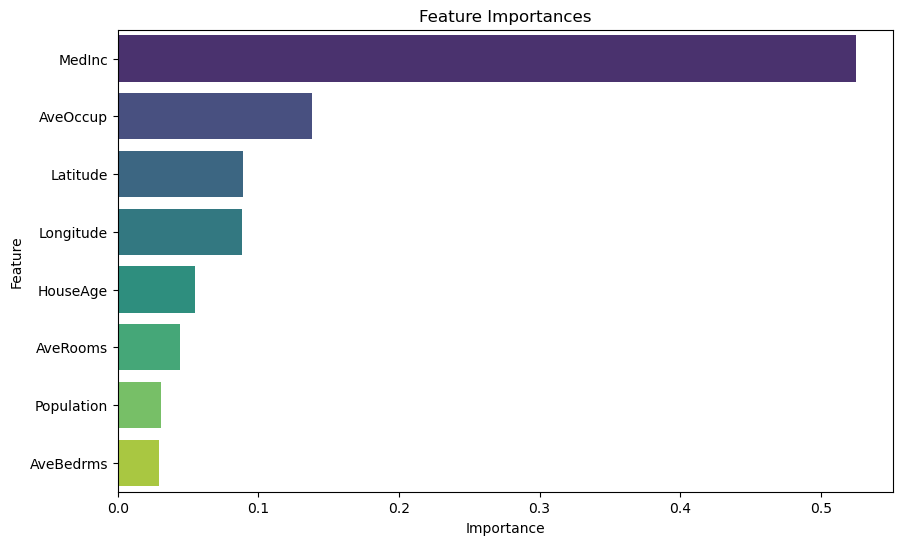

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

It looks like `Latitude` and `Longitude` are important for predicting home value. Let's explore those variables.

Install the `mapdata` package into your `data730` environment.

1. Open a Terminal, and,
2. Run the following command:

```bash
conda install -c conda-forge -n data730 r-mapdata
```

Load the `mapdata` package.

In [27]:
import rpy2.robjects as ro

# Load R package mapdata
ro.r('library(mapdata)')

# You can now call R functions from mapdata here


During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
4: Setting LC_PAPER failed, using "C" 
5: Setting LC_MEASUREMENT failed, using "C" 
R[write to console]: Loading required package: maps



In [30]:
import geopandas as gpd
print(gpd.__version__)


1.0.1


In [43]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Load the dataset
df = pd.read_csv('california-housing.csv')

# Convert DataFrame to a GeoDataFrame, setting geometry from Longitude and Latitude
gdf = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df.Longitude, df.Latitude),
    crs="EPSG:4326"  # Set coordinate reference system (WGS84)
)

# Reproject to Web Mercator (required for contextily basemaps)
gdf = gdf.to_crs(epsg=3857)

# Plot California Housing Data on a Basemap
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(
    ax=ax, 
    column='MedianHouseValue', 
    cmap='viridis', 
    markersize=1, 
    legend=True,
    legend_kwds={'label': "Median House Value", 'orientation': "horizontal"}
)

# Add basemap for better context
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

# Customize plot appearance
ax.set_title("California Housing Prices by Latitude and Longitude")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()




ImportError: libgdal.so.35: cannot open shared object file: No such file or directory

The following code will generate a map of California. Adapt this code to plot `Latitude` and `Longitude` from the `housing` dataset, color points by the `MedianHouseValue`. [Here is an example for reference](https://raw.githubusercontent.com/UNC-DATA-730/a10/main/example.png).


```r
california = map_data("state") |> filter(region == 'california')

ggplot(data = california) + 
    geom_polygon(aes(x = long, y = lat), fill = "grey90", color = "grey40") +
    coord_quickmap() +
    theme_void()
```

In [39]:


california = map_data("state") |> filter(region == 'california')

ggplot(data = california) + 
    geom_polygon(aes(x = long, y = lat), fill = "grey90", color = "grey40") +
    coord_quickmap() +
    theme_void()

SyntaxError: invalid syntax (2500840100.py, line 1)